In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Code

In [27]:
def load_results(model_number):
    
    with open(f"../results/log{model_number}.txt") as file:
        lines = file.readlines()
    
    train_data =[]
    val_data = []
    test_data = []
    for line in lines:
        if 'Train:' in line:
            split_line = np.array(line.split(' '))
            row = [float(entry.strip('\n').strip(',')) for entry in split_line[[2,4,6,8,10]]]
            train_data.append(row)
        if 'Validation:' in line:
            split_line = np.array(line.split(' '))
            row = [float(entry.strip('\n').strip(',')) for entry in split_line[[2,4,6]]]
            val_data.append(row)
        if 'Test:' in line:
            split_line = np.array(line.split(' '))
            row = [float(entry.strip('\n').strip(',')) for entry in split_line[[2,4,6]]]
            test_data.append(row)        
    
    train_data = pd.DataFrame(data=train_data,columns=['Epoch','Train_Loss','Train_Acc','Train_F1','Train_mF'])
    val_data = pd.DataFrame(data=val_data,columns=['Val_Acc','Val_F1','Val_mF'])
    test_data = pd.DataFrame(data=test_data,columns=['Test_Acc','Test_F1','Test_mF'])
    results_df = pd.concat((train_data,val_data,test_data),axis=1)
    best_epoch = np.argmax(results_df['Val_F1'])
    
    return(results_df, best_epoch)

In [40]:
def plot_results(results_df, best_epoch, metric = 'Acc', new_fig=True, linestyle='-'):
    
    if new_fig:
        plt.figure(figsize=(16,5))
    
    window=1
    for c, column in enumerate(['Train_'+metric, 'Val_'+metric,'Test_'+metric]):
        y = results_df[column].rolling(window).mean()    
        plt.plot(y, label=f'{column}',linewidth=2, 
                 marker='.',ms=5, linestyle=linestyle, c=sns.color_palette()[c])

    sns.despine()
    x = results_df['Epoch']
    xticks = range(0,len(x),1)
    plt.xticks(xticks,x[xticks]);
    plt.xlabel('epochs')
    plt.ylabel(metric)

    plt.scatter(best_epoch, results_df.loc[best_epoch,'Val_'+metric],
                s=500,edgecolors='k',facecolors='none',label='early stopping point')
    
    if metric=='F1':
        plt.axhline(y=65.18, linestyle='--',color='k', label='from paper')
#         plt.axhline(y=62.75, linestyle='--',color='k', label='from paper (w/o CS, Roberta)')
    plt.legend()

### Loading Results Using Their Features and Mine

In [41]:
results_df, best_epoch = load_results(1)
results_df.head()

,Epoch,Train_Loss,Train_Acc,Train_F1,Train_mF,Val_Acc,Val_F1,Val_mF,Test_Acc,Test_F1,Test_mF
0,1.0,1.7427,35.15867,28.97276,12.16715,43.10189,31.56919,14.66723,49.08046,37.44749,15.69185
1,2.0,1.3849,52.01722,42.59562,20.16352,59.24256,53.65877,32.71719,62.60536,58.07363,33.32500
2,3.0,1.1209,63.43978,59.92976,36.94853,61.94770,59.22584,40.51960,65.13410,63.17075,40.95340
3,4.0,1.0139,66.48313,63.93499,42.68265,63.57078,61.19496,44.41839,63.98467,62.53210,41.75946
4,5.0,0.9116,70.09711,68.31335,50.21674,63.84130,62.46089,49.57168,65.86207,64.85379,48.57421


In [42]:
results_df2, best_epoch2 = load_results(2)
results_df2.head()

,Epoch,Train_Loss,Train_Acc,Train_F1,Train_mF,Val_Acc,Val_F1,Val_mF,Test_Acc,Test_F1,Test_mF
0,1.0,1.6839,37.76154,27.76501,9.13467,41.29847,25.61337,8.90832,47.16475,31.82915,10.04482
1,2.0,1.4258,49.96496,38.12556,15.71930,50.94680,42.37889,22.50056,56.59004,49.23544,24.47861
2,3.0,1.2420,58.92482,53.70483,30.38434,57.98016,52.97770,34.20139,61.95402,57.25838,34.60440
3,4.0,1.0938,64.21063,61.04547,39.03950,60.95582,57.50158,41.36302,64.48276,62.34632,42.89553
4,5.0,0.9774,67.38412,65.26733,45.78305,63.21010,61.42664,46.24565,66.78161,65.35927,46.89057


### Plot F1

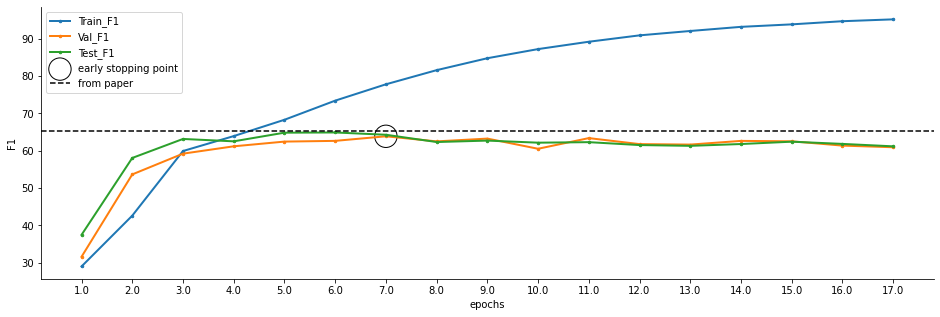

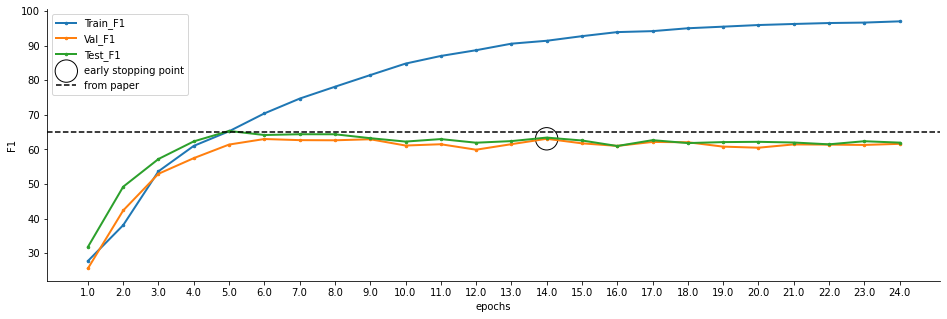

In [43]:
plot_results(results_df, best_epoch, metric = 'F1')
plot_results(results_df2, best_epoch2, metric = 'F1', new_fig=True, linestyle='-')

### Plot Accuracy

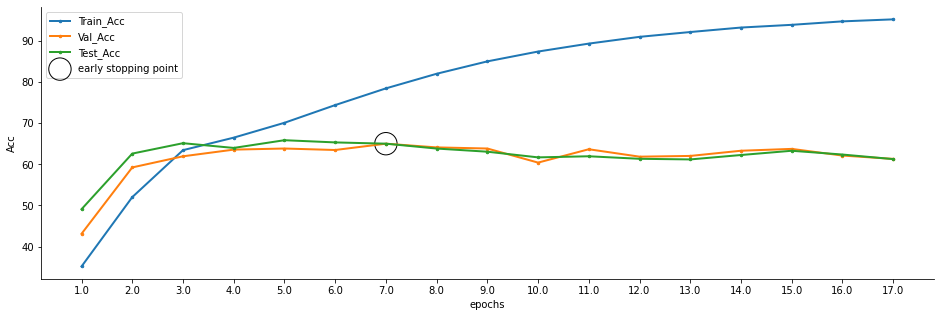

In [44]:
plot_results(results_df, best_epoch, metric = 'Acc')

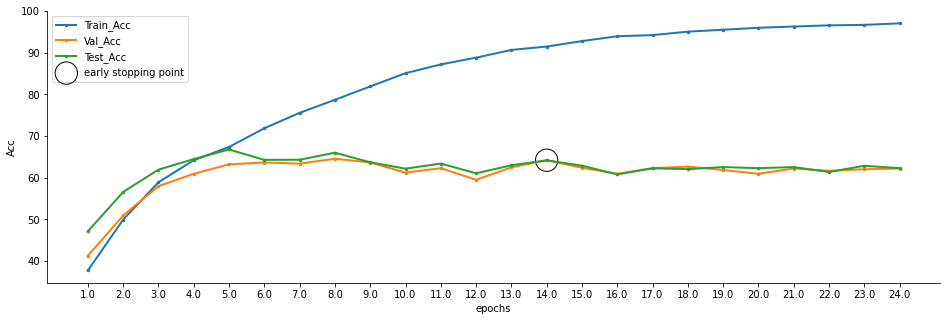

In [45]:
plot_results(results_df2, best_epoch2, metric = 'Acc')